In [1]:
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import networkx as nx
import torch as th
import dgl
import dgllife
from dgllife.utils import load_molecule, mol_to_bigraph
from dgllife.data import PDBBind
from dgllife.utils import 

Using backend: pytorch


In [13]:
pdb_2007_path = "/Users/yuhanche/Documents/Data/pdbbind_v2007"
mols = []
groups = []
for (root, dirs, files) in os.walk(pdb_2007_path):
   for name in files:
       if name.endswith(('.mol2', '.pdb', '.sdf')):
           mols.append(os.path.join(root, name))
   for name in dirs:
      groups.append(os.path.join(root, name))

In [92]:
mol_sdf  = [i for i in mols if 'pdb' in i]
mol, cord = load_molecule(mol_sdf[0], sanitize=False)
type(mol)

rdkit.Chem.rdchem.Mol

In [95]:
from dgllife.utils import CanonicalAtomFeaturizer, CanonicalBondFeaturizer
atom_featurizer = CanonicalAtomFeaturizer(atom_data_field='h') # get 74 default features
bond_featurizer = CanonicalBondFeaturizer(bond_data_field='h') # get 12 default features

g_mol = mol_to_bigraph(mol=mol, node_featurizer=atom_featurizer, edge_featurizer=bond_featurizer)

In [97]:
g_mol.ndata['h'].shape

torch.Size([726, 74])

In [3]:
from dgllife.utils import ACNN_graph_construction_and_featurization
dataset = PDBBind(subset='core', load_binding_pocket=True, sanitize=False, calc_charges=False,
                 remove_hs=False, use_conformation=True,
                 construct_graph_and_featurize=ACNN_graph_construction_and_featurization,
                 zero_padding=True, num_processes=6)

Loading ligands...
Loading proteins...
Finished cleaning the dataset, got 195/195 valid pairs
Start constructing graphs and featurizing them.
Constructing and featurizing datapoint 1/195
Constructing and featurizing datapoint 2/195
Constructing and featurizing datapoint 3/195
Constructing and featurizing datapoint 4/195
Constructing and featurizing datapoint 5/195
Constructing and featurizing datapoint 6/195
Constructing and featurizing datapoint 7/195
Constructing and featurizing datapoint 8/195
Constructing and featurizing datapoint 9/195
Constructing and featurizing datapoint 10/195
Constructing and featurizing datapoint 11/195
Constructing and featurizing datapoint 12/195
Constructing and featurizing datapoint 13/195
Constructing and featurizing datapoint 14/195
Constructing and featurizing datapoint 15/195
Constructing and featurizing datapoint 16/195
Constructing and featurizing datapoint 17/195
Constructing and featurizing datapoint 18/195
Constructing and featurizing datapoint 

In [73]:
from dgllife.utils import mol_to_bigraph, CanonicalAtomFeaturizer, CanonicalBondFeaturizer
inx, ligand_mol, protein_mol, g, label= dataset[0] # use the first as example
node_featurizer = CanonicalAtomFeaturizer(atom_data_field='h')
edge_featurizer = CanonicalBondFeaturizer(bond_data_field='e')
lig_g = mol_to_bigraph(ligand_mol, add_self_loop=False,
                   node_featurizer=node_featurizer,
                   edge_featurizer=edge_featurizer,
                   canonical_atom_order=True,
                   explicit_hydrogens=False)

prot_g = mol_to_bigraph(protein_mol, add_self_loop=False,
                   node_featurizer=node_featurizer,
                   edge_featurizer=edge_featurizer,
                   canonical_atom_order=True,
                   explicit_hydrogens=False)
complx_g = dgl.batch([lig_g, prot_g])

In [96]:
complx_g.edata['e'][0]

tensor([0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.])

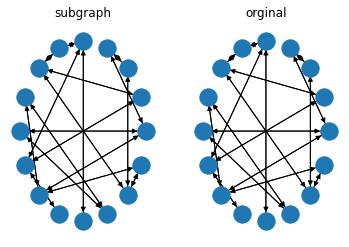

In [75]:
fig, ax = plt.subplots(ncols=2)
nx.draw(lig_g2.to_networkx(), ax=ax[0], pos=nx.circular_layout(lig_g2.to_networkx()))
ax[0].set_title('subgraph')
nx.draw(lig_g.to_networkx(), ax=ax[1], pos=nx.circular_layout(lig_g.to_networkx()))
ax[1].set_title('orginal')
plt.show()

In [87]:
def fuc():
    return 1,2

In [92]:

g.append(fuc())

In [93]:
g

[(1, 2), (1, 2)]

In [ ]:
g = 